## Experiments with scientific colorscales

In order to test the scientific colorscales we plot a surface and its contour plot.
We are displaying two surfaces: one to illustrate the  sequential colorscales, and another for diverging colorscales.

In [1]:
import plotly.plotly as py #import for online posted plots
import numpy as np
from scicolorscales import *

In [2]:
def surface1():
    x = np.linspace(-2, 5, 200)
    y = np.linspace(0, 10, 300)
    x,y = np.meshgrid(x, y)
    z = (x+y)/(2+np.cos(x)*np.sin(y))
    return x, y, z

In [3]:
def surface2():    
    x = np.linspace(-2, 2, 200)
    y = np.linspace(-2, 2, 200)
    x,y = np.meshgrid(x, y)
    z = 2*(x+y)*np.exp(-x**2-y**2)
    return x, y, z

In [4]:
def get_plotly_data(surface=surface1, colorscale=davos, reversescale=False, opacity=1):
    
    x, y, z=surface()

    surf=dict(type='surface', 
              x=x,
              y=y, 
              z=z, 
              colorscale=colorscale,
              reversescale=reversescale,
              colorbar=dict(thickness=20, 
                            ticklen=4),
              opacity=opacity
              )

    contour_plot=dict(type='surface',
                      x=x,
                      y=y,
                      z=-2.*np.ones(x.shape), # the contour plot is drawn on the plane z=-2, 
                      surfacecolor=z, # the plane z=-2 is colored according to the height  of the surface 
                      colorscale=colorscale,
                      reversescale=reversescale,
                      opacity=opacity,
                      showscale=False)
    return [surf, contour_plot]

Define the plot layout:

In [5]:
axes_style = dict(showbackground=True, 
                  backgroundcolor="rgb(230, 230,230)",
                  gridcolor="rgb(255, 255, 255)",      
                  zerolinecolor="rgb(255, 255, 255)")

layout = dict(title='', 
              width=800,
              height=650,
              scene=dict(camera=dict(eye=dict(x=1.25, y=1.25, z=0.6)),
                         xaxis=axes_style,
                         yaxis=axes_style, 
                         zaxis=dict(axes_style, **dict(range=[-2.5, 12])),
                         aspectratio=dict(x=1,
                                          y=1,
                                          z=0.85)
                        )
             )

 `bilbao`, `davos`, `devon`, `lajolla`, `lapaz`, `oslo`, `tokyo`, and `turku` are sequential colorscales.

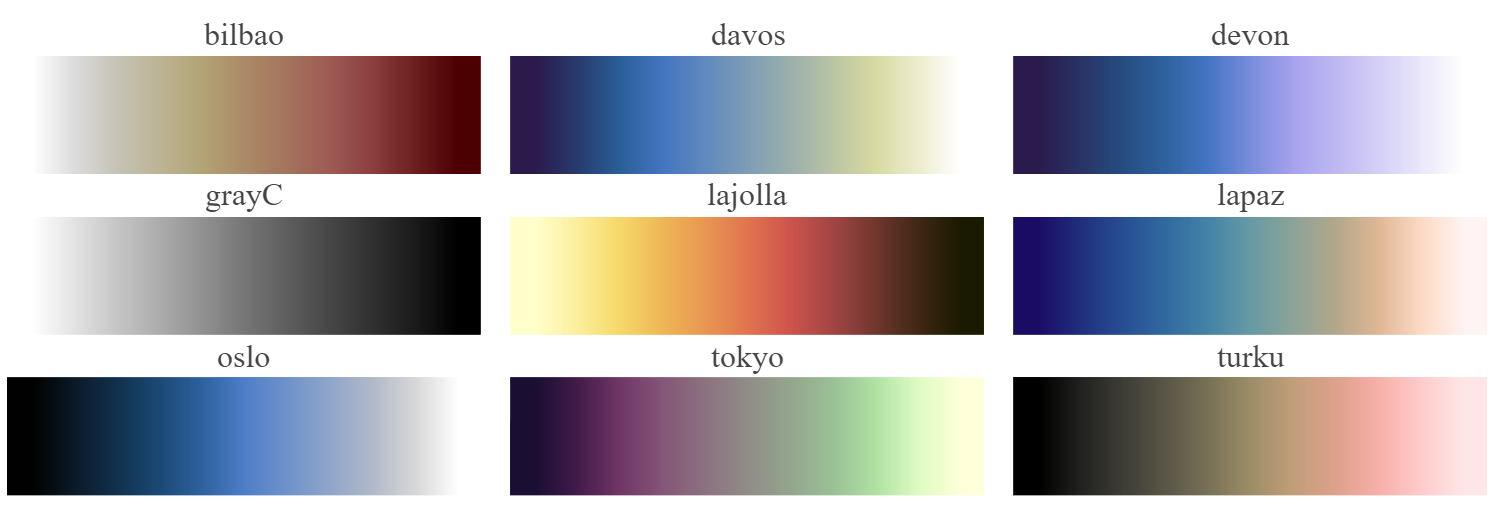

In [6]:
from IPython.display import Image
Image(filename='Images/seq.png')

Surface plot with `lapaz` colorscale:

In [7]:
data1=get_plotly_data(colorscale=lapaz)
layout.update(title='Plot with lapaz colorscale')
fig1=dict(data=data1, layout=layout)

In [8]:
py.sign_in('empet', 'my_api_key')
py.iplot(fig1, filename='scientific-clsc')#send the plot to Plotly cloud

For an offline plot, i.e. a plot displayed only in this Jupyter Notebook, uncomment the code from the next two cells:

In [9]:
#from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
#init_notebook_mode(connected=True)

In [10]:
#iplot(fig1)

`berlin`, `broc`, `cork`, `lisbon`, `roma`, `tofino`, and `vik` are diverging scientific colorscales, while `oleron` is a special one, defined by concatenating two sequential colorscales.

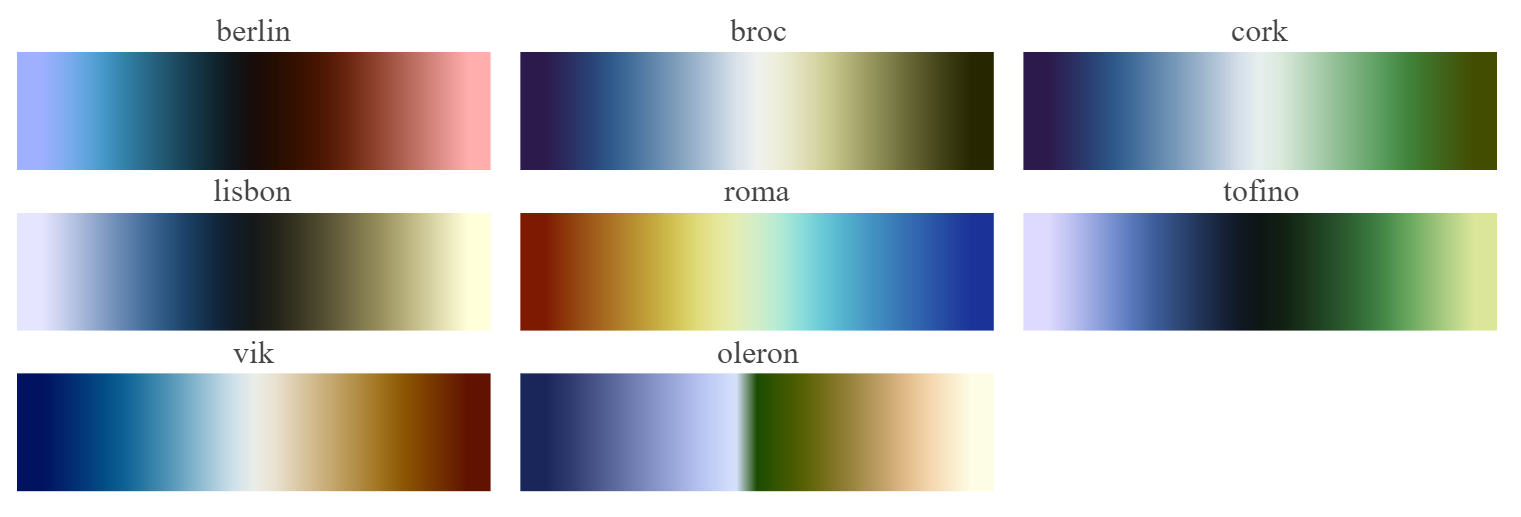

In [11]:
Image(filename='Images/div.png')

In [12]:
data2=get_plotly_data(surface=surface2, colorscale=vik)
layout['scene'].update(zaxis=dict(axes_style, **dict(range=[-2.5,1.5])),
                       camera=dict(eye=dict(x=-1.25, y=1.25, z=0.6)))
layout.update(title='Plot with vik colorscale')
fig2=dict(data=data2, layout=layout)
py.iplot(fig2, filename='scientific-divclsc')

In [13]:
#iplot(fig2)# for an offline plot

Here is a pannel of heatmaps:

In [14]:
from IPython.display import HTML
HTML('<iframe src=https://plot.ly/~empet/14862 width=850 height=1000></iframe>')

In [16]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()